### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('/Users/miguel/HaaS/Module 5/assignment_5_1_starter/data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
#Checking data types for columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [5]:
#Checking the size of the datafram
data.shape

(12684, 26)

In [6]:
#Checking for the count of null data
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [7]:
#Checking the proportion of missing data to the entire row count
data.isnull().mean()*1

destination             0.000000
passanger               0.000000
weather                 0.000000
temperature             0.000000
time                    0.000000
coupon                  0.000000
expiration              0.000000
gender                  0.000000
age                     0.000000
maritalStatus           0.000000
has_children            0.000000
education               0.000000
occupation              0.000000
income                  0.000000
car                     0.991485
Bar                     0.008436
CoffeeHouse             0.017108
CarryAway               0.011905
RestaurantLessThan20    0.010249
Restaurant20To50        0.014901
toCoupon_GEQ5min        0.000000
toCoupon_GEQ15min       0.000000
toCoupon_GEQ25min       0.000000
direction_same          0.000000
direction_opp           0.000000
Y                       0.000000
dtype: float64

3. Decide what to do about your missing data -- drop, replace, other...

In [8]:
#I am going to remove the Car column as it is missing 99% of the entire row count, but I am keeping the other columns missing data as they missing ~1%
data1 = data.drop('car', axis =1 )
data1['Bar'] = data1['Bar'].fillna('never')
#I did have to come back and replace the age column with values and then changed the column to a integer type
data1['age'] = data1['age'].replace({'50plus': 55, 'below21': 20})
data1['age'] = pd.to_numeric(data1['age'], errors='coerce', downcast='integer')
data1

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


4. What proportion of the total observations chose to accept the coupon? 



In [9]:
#Since the Y column is already set up as binary, and there is no missing values, I ran the average and rounded the value to make it look prettier. 
accepted = round(data1['Y'].mean()*100, 1)
accepted
print('The Proportion of those who chose to accept the coupon is', accepted, '%')

The Proportion of those who chose to accept the coupon is 56.8 %


5. Use a bar plot to visualize the `coupon` column.

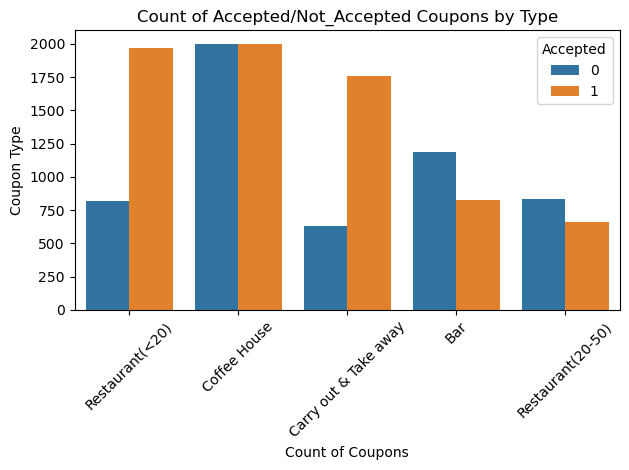

In [10]:
#I chose the seaborn chart
#The bar chart below definitely hits on the Accepted proportion of 57% coupon acceptance, which is why I chose to drop the Y column into the hue. 
#It seems that a Coffee House coupon is 50/50 but the Restaurant <$20 and the Take Out coupons are pretty successful.
coupon_chart = sns.countplot(data = data1, hue='Y', x='coupon')
plt.xlabel('Count of Coupons')
plt.ylabel('Coupon Type')
plt.title('Count of Accepted/Not_Accepted Coupons by Type')
plt.legend(title='Accepted')
plt.xticks(rotation=45)
plt.tight_layout()

6. Use a histogram to visualize the temperature column.

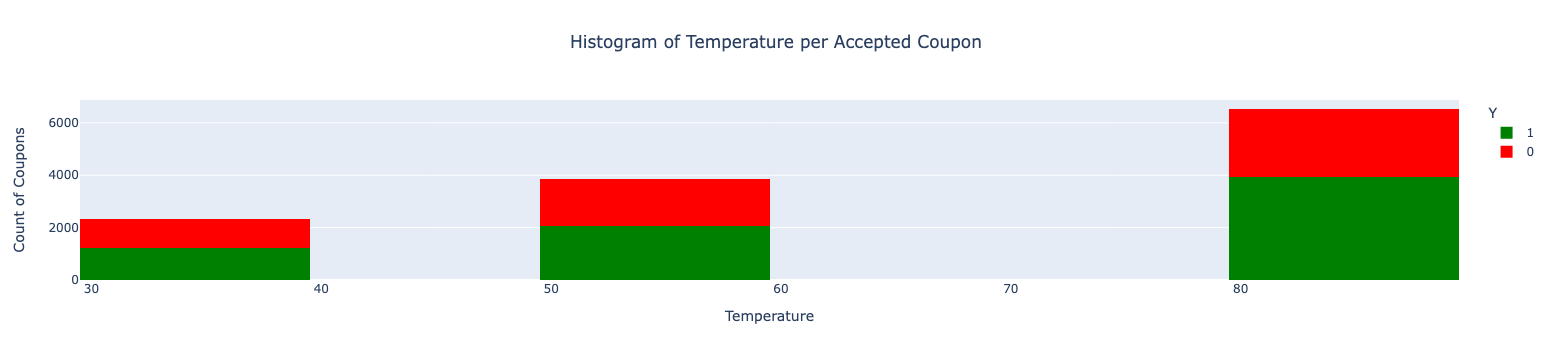

In [106]:
#I wanted to use Plotly first as their charts have the interactivity, I also included the Y column in the legend to get a visual if accepted coupons based on temperature. 
#As can be seen in the chart below, more coupons were sent out at 80 degree weather over 55 and 30 degree. 
Temp_hist = px.histogram(data1, x='temperature', color='Y', nbins=10,
                   labels={'temperature': 'Temperature'},
                   title='Histogram of Temperature per Accepted Coupon',
                    color_discrete_map={0: 'red', 1: 'green'})
Temp_hist.update_layout(xaxis_title='Temperature', yaxis_title='Count of Coupons', title_x=0.5, title_y=0.9)
Temp_hist

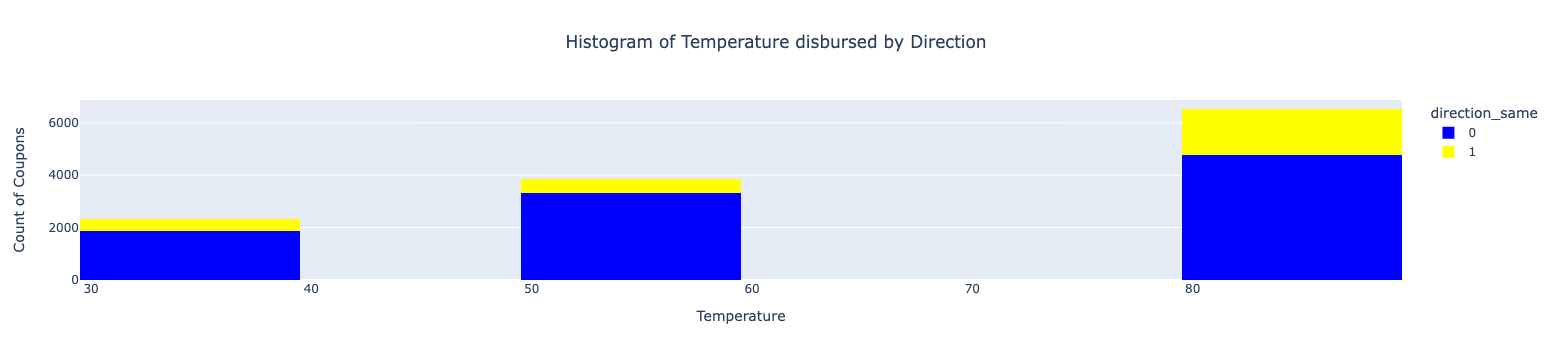

In [104]:
#I wanted to test out the direction attribute and noticed that most of the coupons were sent as the driver was driver in the opposite direction.
Temp_hist1 = px.histogram(data1, x='temperature', color='direction_same', nbins=10,
                   labels={'temperature': 'Temperature'},
                   title='Histogram of Temperature disbursed by Direction',
                    color_discrete_map={0: 'blue', 1: 'yellow'})
Temp_hist1.update_layout(xaxis_title='Temperature', yaxis_title='Count of Coupons', title_x=0.5, title_y=0.9)
Temp_hist1

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [13]:
#I created a new dataframe filtered for 'Bar' on the coupons column, named it bar
bar = data1[data1['coupon']=='Bar']
bar.head(3)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0


2. What proportion of bar coupons were accepted?


In [14]:
#After filtering for bar coupons I created ran a normalize = True to show the proportion between both 1 and 0. Previously I used a .mean to calculate proportion, but that was to obtain only the percent of accepted. 
ratio = round(bar['Y'].value_counts(normalize=True).sort_index(), 2)
print(ratio)

Y
0    0.59
1    0.41
Name: proportion, dtype: float64


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [15]:
#First I grouped by the Bar column
bar_group = bar.groupby('Bar')['Y'].size()
print(bar_group)

Bar
1~3      397
4~8      150
gt8       49
less1    570
never    851
Name: Y, dtype: int64


In [16]:
#Second I grouped by the Bar column and aggregated the Y Column
bar_group_y = bar.groupby('Bar')['Y'].sum()
print(bar_group_y)

Bar
1~3      257
4~8      117
gt8       36
less1    253
never    164
Name: Y, dtype: int64


In [122]:
#Finally, I divided by both groupby's to get my acceptance rate per visits to a Bar
#While the 1~3 group has a lower acceptance rate, it has a bigger sample size than the folks who say they visit the bar more than 3 times a month
acceptance_rate_bar = round(bar_group_y / bar_group, 2).sort_values(ascending=False)
print(acceptance_rate_bar)

Bar
4~8      0.78
gt8      0.73
1~3      0.65
less1    0.44
never    0.19
Name: Y, dtype: float64


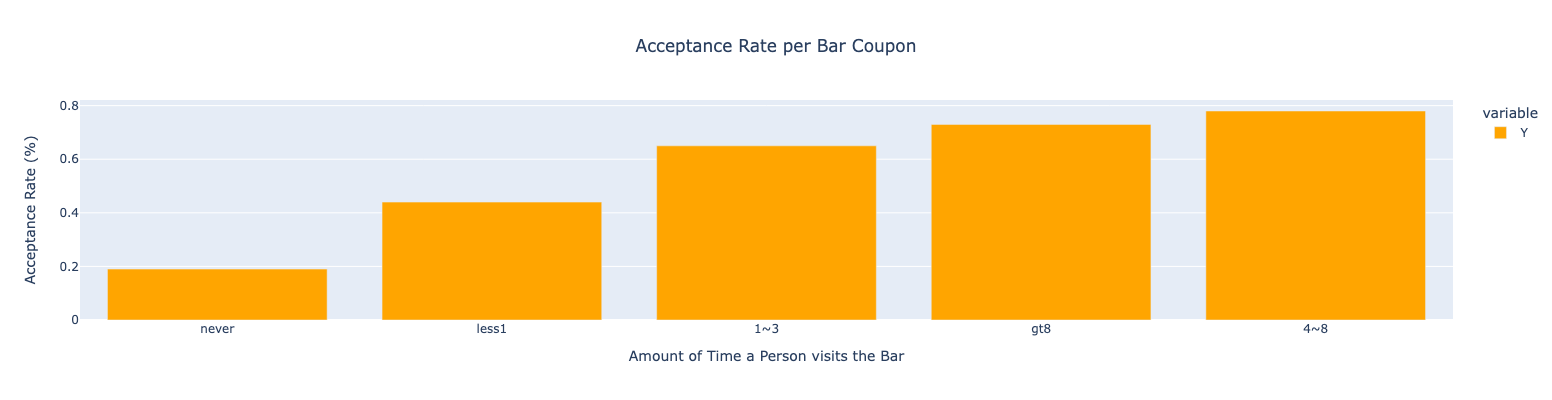

In [77]:
acceptance_rate_sorted = acceptance_rate_bar.sort_values()
occupation_fig = px.bar(acceptance_rate_sorted,
              color_discrete_sequence=['orange'],
            title='Acceptance Rate per Bar Coupon',
              width=1000, height=400)
occupation_fig.update_layout(xaxis_title='Amount of Time a Person visits the Bar', yaxis_title='Acceptance Rate (%)', title_x=0.5, title_y=0.9)
occupation_fig

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [18]:
#I created a subdataset that filters for people who visit 1 or more a month
bar2 = bar[bar['Bar'].isin(['1~3', '4~8', 'gt8'])]
#Here I created a column called 'group', and added 'Less than 25'
bar2['group'] = 'Less than 25'
#Adding to the group column, I had to select anyone older than 25
bar2.loc[(bar2['age'] > 25), 'group'] = 'Older than 25'
#Here I grouped by the 'group' column and averaged the Y column as it is binary
acceptance_rate = round(bar2.groupby('group')['Y'].mean(), 2)
print(acceptance_rate)

group
Less than 25     0.67
Older than 25    0.70
Name: Y, dtype: float64


/var/folders/ml/_j6_xftn7z56b3qxgth3_76r0000gn/T/ipykernel_57475/351036820.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [58]:
#Here I filtered on the Passanger column for Friends and Partnet, additionally I excluding Fishin & Forestry from the occupation column
bar3 = bar[bar['passanger'].isin(['Friend(s)', 'Partner']) & (bar['occupation'] != 'Farming Fishing & Forestry')]

#Here I grouped by the 'Passanger' column and averaged the Y column as it is binary
acceptance_rate = round(bar3.groupby('passanger')['Y'].mean(), 2)
print(acceptance_rate)

passanger
Friend(s)    0.56
Partner      0.39
Name: Y, dtype: float64


In [119]:
#Here I grouped by the 'occupation' column and averaged the Y column as it is binary
acceptance_rate = round(bar3.groupby(['occupation'])['Y'].mean().sort_values(ascending=False), 2)
print(acceptance_rate)

occupation
Architecture & Engineering                   0.88
Food Preparation & Serving Related           0.75
Healthcare Support                           0.71
Construction & Extraction                    0.70
Building & Grounds Cleaning & Maintenance    0.67
Business & Financial                         0.66
Office & Administrative Support              0.62
Protective Service                           0.62
Life Physical Social Science                 0.60
Student                                      0.59
Management                                   0.58
Arts Design Entertainment Sports & Media     0.54
Healthcare Practitioners & Technical         0.53
Production Occupations                       0.50
Computer & Mathematical                      0.49
Transportation & Material Moving             0.42
Installation Maintenance & Repair            0.40
Sales & Related                              0.38
Legal                                        0.36
Community & Social Services            

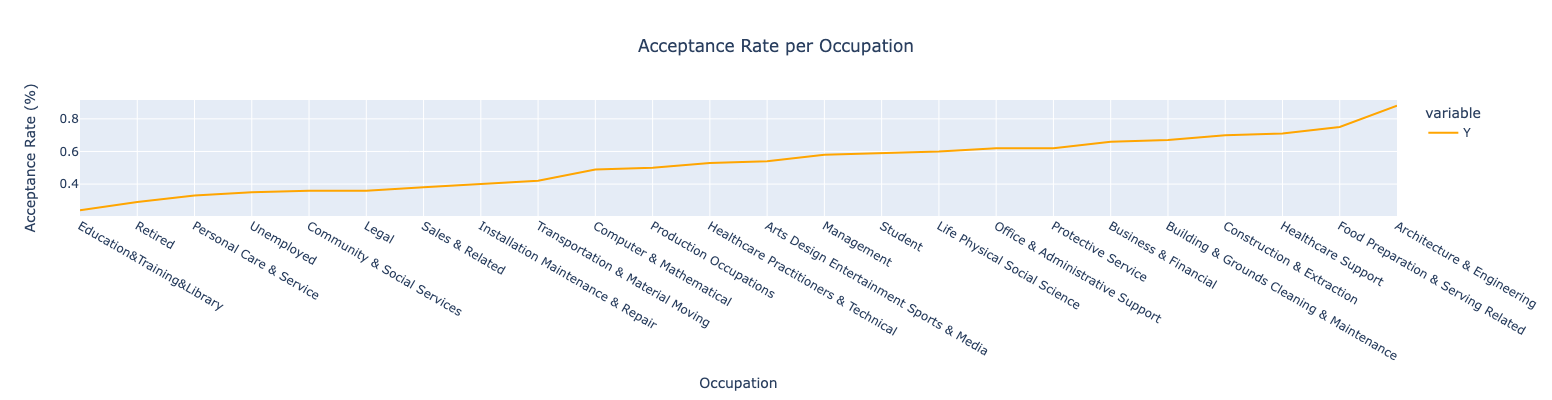

In [69]:
#I wanted to sort the values in ascending order
acceptance_rate_sorted = acceptance_rate.sort_values()
#Here I wanted a visual, mainly a line chart showing which occupation held the higher acceptance rate.
occupation_fig = px.line(acceptance_rate_sorted,
              color_discrete_sequence=['orange'],
            title='Acceptance Rate per Occupation',
              width=1000, height=400)
occupation_fig.update_layout(xaxis_title='Occupation', yaxis_title='Acceptance Rate (%)', title_x=0.5, title_y=0.9)
occupation_fig

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [80]:
#I chose to find the acceptance rate for those who go to cheap restaurants more than 4 times a month and income is less than 50K.
#I needed to see how what that input looks like in the coupon column
data1.groupby('coupon')['Y'].size()

coupon
Bar                      2017
Carry out & Take away    2393
Coffee House             3996
Restaurant(20-50)        1492
Restaurant(<20)          2786
Name: Y, dtype: int64

In [118]:
#Here I wanted I wanted a visual of those in the income column and their size within the dataset
data1.groupby('income')['Y'].size().sort_values(ascending=False)

income
$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: Y, dtype: int64

In [85]:
#I created a new dataframe filtered for 'Restaurant(<20)' from the coupons column, named it rest. I also only included incomes less than $50k
rest = data1[(data1['coupon']=='Restaurant(<20)') & data1['income'].isin(['$12500 - $24999', '$25000 - $37499', '$37500 - $49999', 'Less than $12500'])]
rest.head(3)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1


In [110]:
#Here I calculated the accpetance rate for those who make less than $50k and visit the cheapear restaurant. 
rest_group = rest.groupby(['RestaurantLessThan20'])['Y'].size()
rest_group_y = rest.groupby(['RestaurantLessThan20'])['Y'].sum()
acceptance_rate_rest = round(rest_group_y / rest_group, 2)
print(acceptance_rate_rest)

RestaurantLessThan20
1~3      0.71
4~8      0.70
gt8      0.73
less1    0.74
never    0.56
Name: Y, dtype: float64


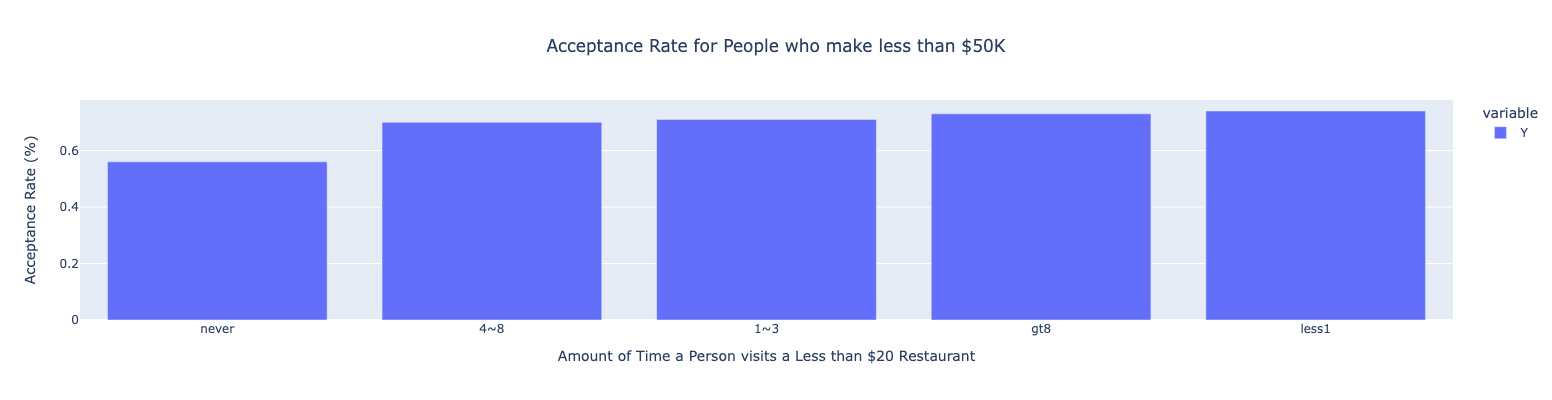

In [117]:
#Even though the numbers above show that this sample group is highly likely to accept a coupon, I still wanted to create a visual. 
acceptance_rate_sorted = acceptance_rate_rest.sort_values()
income_fig = px.bar(acceptance_rate_sorted,
            title='Acceptance Rate for People who make less than $50K',
              width=1000, height=400)
income_fig.update_layout(xaxis_title='Amount of Time a Person visits a Less than $20 Restaurant', yaxis_title='Acceptance Rate (%)', title_x=0.5, title_y=0.9)
income_fig

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Of the 41% of people who accepted the Bar coupon, it is safe to assume that te majority are older than 25 and frequent a bar more that 4 times a month. Additionally, those who will accept the coupon are traveling with the a partner who is not a child. These individuals also more than likely work within the following feilds: Architecture & Engineering, Food Preparation & Serving Related, Healthcare Support and Construction & Extraction. 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  